# COVID-19 calculation
Quick calculation based on problem posed by @3blue1brown on Twitter : https://twitter.com/3blue1brown/status/1333121058824613889?s=20

> Say where you live, 1 in 1,000 actively have covid-19. You feel fatigued and have a slight sore throat, so you take a test, get a positive result.
>
> You learn the test has a 1% false positives, and 10% false negatives.  What's your best guess for your chances of having covid-19?

Let $C$ be the probability that a random member of the population has covid-19, $S$ be the probability that you are symptomatic, and $T$ be the probability that you return a positive test. We want to calculate

\begin{align*}
P(C|ST) &= \frac{P(C)P(S|C)P(T|C)}{P(C)P(S|C)P(T|C) + P(\bar{C})P(S|\bar{C})P(T|\bar{C})}
\end{align*}

We know $P(C) = 0.001$, $P(T|C) = 0.9$, and $P(T|\bar{C}) = 0.01$, so we can investigate the dependence on the two unknowns $P(S|C)$ and $P(S|\bar{C})$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
C = 1e-3
nC = 1 - C
T_C = 0.9
T_nC = 0.01;

S_C, S_nC = np.mgrid[0.0001:1:100j, 0.0001:1:100j]
C_ST = (T_C*S_C*C) / (C*S_C*T_C + nC*S_nC*T_nC)

Text(0.5, 0.92, 'P(covid | symptomatic and positive test)')

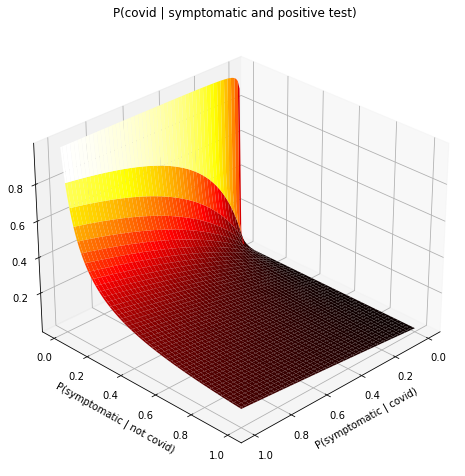

In [4]:
fig = plt.figure(figsize=(8, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(S_C, S_nC, C_ST, cmap = cm.hot)
ax.view_init(29, 45)
plt.xlabel('P(symptomatic | covid)')
plt.ylabel('P(symptomatic | not covid)')
plt.title('P(covid | symptomatic and positive test)')